In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Load the Data

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [145]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
gender_df=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [146]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Feature cleaning

In [147]:
combine=[train_df,test_df]

## Sex

In [148]:
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'male':1,'female':0})

## Age

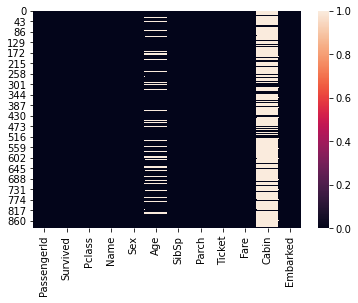

In [149]:
sns.heatmap(train_df.isnull())

In [150]:
train_df[train_df['Age'].isnull()==False].groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [151]:
int(train_df[train_df['Age'].isnull()==False].groupby('Pclass').mean()['Age'].loc[1])

38

In [152]:
#train_df.loc[(train_df['Pclass']==1)&(pd.isnull(train_df['Age'])==True),'Age']=int(train_df[train_df['Age'].isnull()==False].groupby('Pclass').mean()['Age'].loc[1])

In [153]:
#train_df.loc[(train_df['Pclass']==2)&(pd.isnull(train_df['Age'])==True),'Age']=int(train_df[train_df['Age'].isnull()==False].groupby('Pclass').mean()['Age'].loc[2])

In [154]:
#train_df.loc[(train_df['Pclass']==3)&(train_df['Age'].isnull()),'Age']=int(train_df[train_df['Age'].isnull()==False].groupby('Pclass').mean()['Age'].loc[3])

In [155]:
def guess_age(col):
    age=col[0]
    pclass=col[1]

    if pd.isnull(age)==True:
  
   
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 25
    else:
        return age
                   

In [156]:
def guess_age1(age,pclass):
    if pd.isnull(age)==True:
   
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 25
    else:
        return age

In [157]:
#train_df['Age']=train_df.apply(lambda x: guess_age1(x['Age'],x['Pclass']),axis=1)

In [158]:
for dataset in combine:
    dataset['Age']=dataset[['Age','Pclass']].apply(guess_age,axis=1)

## Name

In [159]:
train_df['Name'].isnull().sum()

0

In [160]:
for dataset in combine:
    dataset["Title"] = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]


In [161]:
pd.crosstab(train_df['Title'], train_df['Sex'])


Sex,0,1
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [162]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr


In [163]:
train_df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [164]:
train_df['Sex'][1]

0

In [165]:
train_df['Sex'][0]

1

In [166]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
    dataset["Title"] = dataset["Title"].astype(int)
  

In [167]:
for dataset in combine:
    dataset.drop('Name',axis=1,inplace=True)

In [168]:
#for dataset in combine:
    #dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


## Embarked

In [169]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [170]:
train_df.dropna(subset=['Embarked'],inplace=True)

In [171]:
train_df['Embarked'].isnull().sum()

0

In [172]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [173]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0.33,'C':0.55,'Q':0.39})

## Other features (SibSp, Fare,Parch)

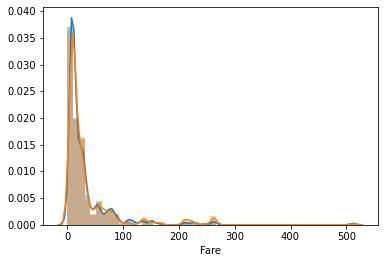

In [174]:
for dataset in combine:
    sns.distplot(dataset['Fare'])

In [175]:
#index = train_df[(train_df['Fare'] >= 200)].index 
#train_df.drop(index, inplace=True)

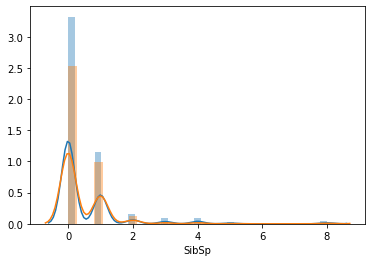

In [176]:
for dataset in combine:
    sns.distplot(dataset['SibSp'])



In [177]:
train_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [178]:
train_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

## Feature to drop

In [179]:
for dataset in combine:
    dataset.drop(['Cabin','Ticket'],axis=1,inplace=True)

## Feature importance

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=train_df[['Pclass','Age','Sex','SibSp','Parch','Fare']]
variables

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,1,1,0,7.2500
1,1,38.0,0,1,0,71.2833
2,3,26.0,0,0,0,7.9250
3,1,35.0,0,1,0,53.1000
4,3,35.0,1,0,0,8.0500
...,...,...,...,...,...,...
886,2,27.0,1,0,0,13.0000
887,1,19.0,0,0,0,30.0000
888,3,25.0,0,1,2,23.4500
889,1,26.0,1,0,0,30.0000


In [181]:
vif=pd.DataFrame()
vif['Feature']=variables.columns
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]


            
vif

,Feature,VIF
0,Pclass,4.400653
1,Age,4.064338
2,Sex,3.058676
3,SibSp,1.561463
4,Parch,1.602667
5,Fare,1.680292


In [182]:
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

# Split train validation

In [183]:
train_df.drop('PassengerId',axis=1, inplace=True)

In [184]:
X=train_df.drop('Survived',axis=1)
y=train_df['Survived']
X_test=test_df

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_vali,y_train,y_vali=train_test_split(X,y,train_size=0.8,random_state=101)

In [186]:
test_df.loc[(test_df['Fare'].isnull()==True),'Fare']=test_df.groupby('Pclass').mean()['Fare'].loc[3]

In [187]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

# Model

In [188]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

score_logreg = round(logreg.score(X_train, y_train) * 100, 2)
score_logreg

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


82.42

In [189]:
predict=logreg.predict(X_vali)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_vali,predict))
print(confusion_matrix(y_vali,predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.85      0.75      0.80        71

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178

[[98  9]
 [18 53]]


In [190]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
score_ETC= round(ETC.score(X_train, y_train) * 100, 2)
score_ETC

98.73

In [191]:

pd.crosstab(X_train.columns, ETC.feature_importances_)


col_0,0.031356,0.032713,0.047590,0.096565,0.116668,0.209664,0.224647,0.240797
row_0,,,,,,,,
Age,0,0,0,0,0,0,1,0
Embarked,0,1,0,0,0,0,0,0
Fare,0,0,0,0,0,0,0,1
Parch,1,0,0,0,0,0,0,0
Pclass,0,0,0,1,0,0,0,0
Sex,0,0,0,0,0,1,0,0
SibSp,0,0,1,0,0,0,0,0
Title,0,0,0,0,1,0,0,0


In [192]:
pd.DataFrame(ETC.feature_importances_,X_train.columns)

,0
Pclass,0.096565
Sex,0.209664
Age,0.224647
SibSp,0.047590
Parch,0.031356
Fare,0.240797
Embarked,0.032713
Title,0.116668


In [193]:
predict=ETC.predict(X_vali)

print(classification_report(y_vali,predict))
print(confusion_matrix(y_vali,predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.75      0.77      0.76        71

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

[[89 18]
 [16 55]]


In [194]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

score_knn= round(knn.score(X_train, y_train) * 100, 2)
score_knn

83.97

In [195]:
predict=knn.predict(X_vali)

print(classification_report(y_vali,predict))
print(confusion_matrix(y_vali,predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       107
           1       0.64      0.69      0.67        71

    accuracy                           0.72       178
   macro avg       0.71      0.72      0.72       178
weighted avg       0.73      0.72      0.73       178

[[80 27]
 [22 49]]


In [196]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier()
DTree.fit(X_train, y_train)

score_dtree= round(DTree.score(X_train, y_train) * 100, 2)
score_dtree

98.73

In [197]:
predict=DTree.predict(X_vali)

print(classification_report(y_vali,predict))
print(confusion_matrix(y_vali,predict))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       107
           1       0.70      0.72      0.71        71

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.76      0.76       178

[[85 22]
 [20 51]]


In [198]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score_rfc= round(rfc.score(X_train, y_train) * 100, 2)
score_rfc


98.73

In [199]:
predict=rfc.predict(X_vali)

print(classification_report(y_vali,predict))
print(confusion_matrix(y_vali,predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.78      0.76      0.77        71

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

[[92 15]
 [17 54]]


In [200]:
pd.DataFrame(rfc.feature_importances_,X_train.columns)

,0
Pclass,0.084771
Sex,0.140712
Age,0.237593
SibSp,0.054521
Parch,0.034768
Fare,0.252290
Embarked,0.031170
Title,0.164174


In [201]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier() 
sgd.fit(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2) 
acc_sgd

72.15

In [202]:
predict=sgd.predict(X_vali)

print(classification_report(y_vali,predict))
print(confusion_matrix(y_vali,predict))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73       107
           1       0.61      0.90      0.73        71

    accuracy                           0.73       178
   macro avg       0.76      0.76      0.73       178
weighted avg       0.79      0.73      0.73       178

[[66 41]
 [ 7 64]]


In [203]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron() 
perceptron.fit(X_train, y_train)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2) 
acc_perceptron

71.17

In [204]:
predict=perceptron.predict(X_vali)

print(classification_report(y_vali,predict))
print(confusion_matrix(y_vali,predict))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73       107
           1       0.61      0.87      0.72        71

    accuracy                           0.72       178
   macro avg       0.74      0.75      0.72       178
weighted avg       0.77      0.72      0.73       178

[[67 40]
 [ 9 62]]


In [205]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2) 
acc_gaussian

80.73

In [206]:
predict=gaussian.predict(X_vali)

print(classification_report(y_vali,predict))
print(confusion_matrix(y_vali,predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.84      0.79      0.81        71

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.85       178
weighted avg       0.85      0.85      0.85       178

[[96 11]
 [15 56]]


In [224]:
from xgboost import XGBRegressor
XGB=XGBRegressor(n_estimators=500,learning_rate=0.05, n_jobs=4)
XGB.fit(X_train,y_train,
        early_stopping_rounds=5000, 
             eval_set=[(X_vali, y_vali)], 
             verbose=False)
acc_XGB=round(XGB.score(X_train, y_train) * 100, 2) 
acc_XGB



72.26

# Ensemble

# Predict on test data

In [209]:
test_df.shape

(418, 9)

In [225]:
pred=logreg.predict(test_df.drop('PassengerId',axis=1))
pred

array([ 9.07581151e-02, -9.74841714e-02,  1.92418516e-01,  1.21550292e-01,
        5.07897198e-01,  1.29361510e-01,  4.27269638e-01,  4.93764877e-04,
        8.64693880e-01,  6.99707866e-02,  7.60415494e-02,  5.47530353e-02,
        9.71439481e-01,  1.43018305e-01,  9.44571257e-01,  9.35631871e-01,
        1.09997571e-01,  1.22857213e-01,  6.27489269e-01,  1.14308298e-01,
        3.53741497e-01,  4.46481466e-01,  9.35435474e-01,  3.79770458e-01,
        9.37630177e-01,  6.76077902e-02,  9.76764560e-01,  1.22857213e-01,
        5.90957105e-01,  2.45360047e-01,  7.32929707e-02,  1.04217887e-01,
        8.08339059e-01,  5.76630831e-02,  4.42393929e-01,  1.23711705e-01,
        3.24052781e-01,  4.21562850e-01,  9.21304524e-02,  9.06048238e-01,
        7.71426558e-02,  5.15354574e-01,  8.64551961e-02,  9.52075481e-01,
        9.44571257e-01,  1.34418845e-01,  3.71473014e-01,  1.32700980e-01,
        8.28064084e-01,  7.37514794e-01,  4.99692678e-01,  1.25283837e-01,
        9.34739232e-01,  

In [211]:
output = pd.DataFrame({"PassengerId": test_df['PassengerId'], "Survived": pred})
output.to_csv('my_submission.csv', index=False)

In [212]:
output.shape

(418, 2)